## Stardist for cell detection

1. Does Stardist seem like a good candidate for my images? -yes
2. Do I need to label the images myself or can we use pretrained model? -looks alright, maybe pretrained + some image processing = enough

In [1]:
from stardist.models import StarDist2D 

# prints a list of available models 
StarDist2D.from_pretrained() 

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

2022-03-03 09:57:55.953035: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-03 09:57:55.953055: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


2022-03-03 09:57:56.746281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-03 09:57:56.746300: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-03 09:57:56.746311: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (solveig-ThinkPad-X1-Carbon-Gen-9): /proc/driver/nvidia/version does not exist
2022-03-03 09:57:56.746422: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from skimage import io
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

manage_plugins.py (23): Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.


In [3]:
from stardist.data import test_image_nuclei_2d
from skimage.color import rgb2gray

img = test_image_nuclei_2d()

img2 = io.imread('../data/raw/0104_p301s_nissl.jpg') 
img2_gray = rgb2gray(img2)
print(img.shape)
print(img2.shape)
print(img2_gray.shape)

(512, 512)
(2048, 2048, 3)
(2048, 2048)


2022-03-03 09:57:58.968863: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2022-03-03 09:57:59.068532: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2022-03-03 09:58:00.140559: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.


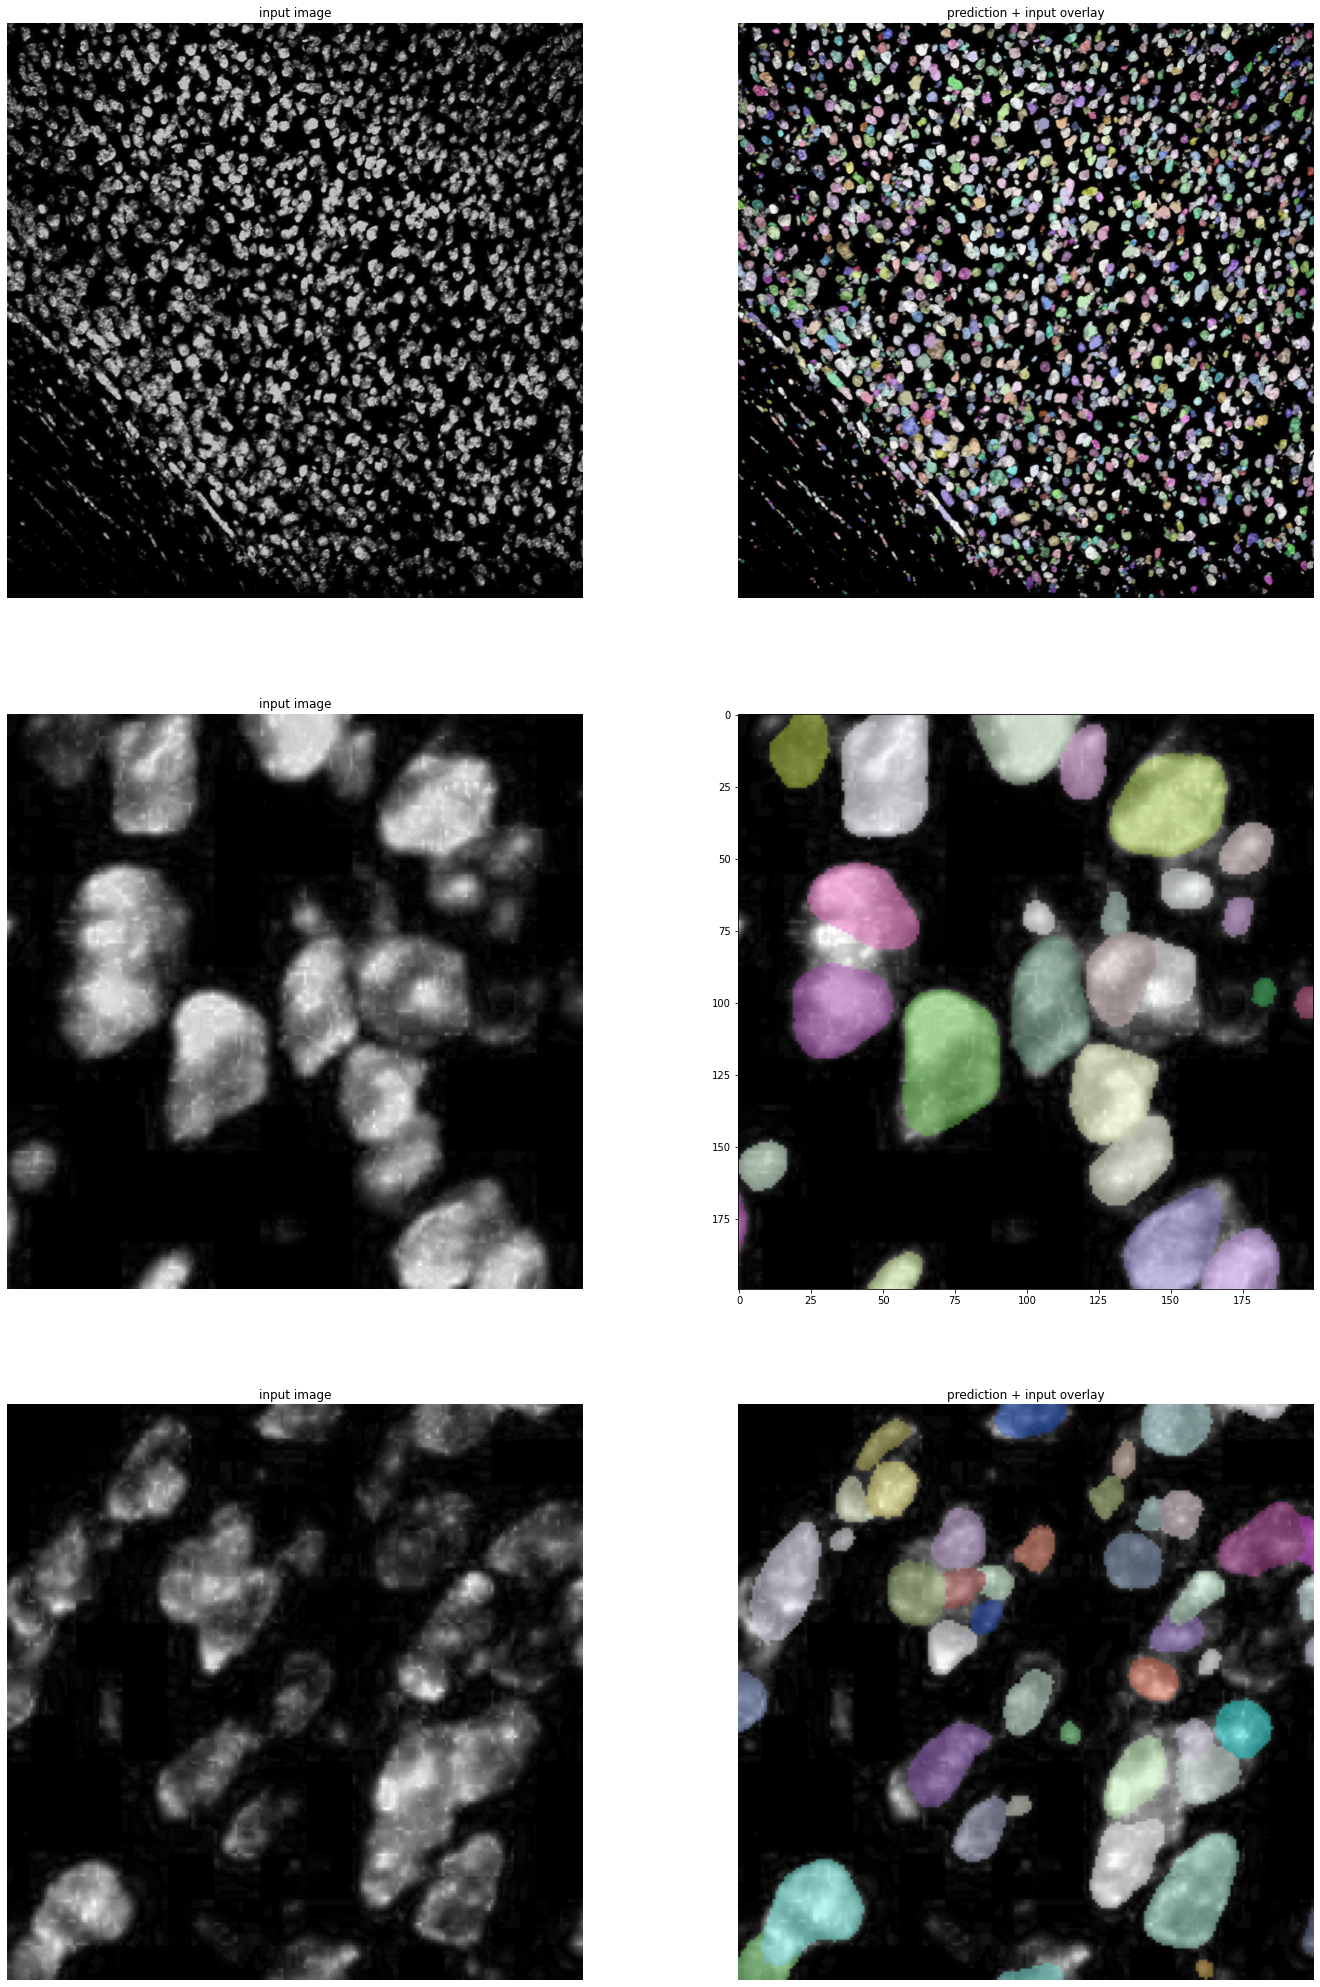

In [4]:
img_nissl = io.imread('../data/raw/0104_p301s_nissl.jpg') 
img_nissl_gray = rgb2gray(img2)
labels_nissl, _ = model.predict_instances(normalize(img2_gray))

fig = plt.figure(figsize=(24, 36))
plt.title('nissl')

plt.subplot(3,2,1)
plt.imshow(img2_gray, cmap='gray')
plt.axis("off")
plt.title("input image")

plt.subplot(3,2,2)
plt.imshow(render_label(labels_nissl, 
                        img=img_nissl_gray))
plt.axis("off")
plt.title("prediction + input overlay")

plt.subplot(3,2,3)
plt.imshow(img_nissl_gray[1000:1200, 1000:1200], 
           cmap='gray')
plt.axis("off")
plt.title("input image")

plt.subplot(3,2,4)
plt.imshow(render_label(labels_nissl[1000:1200,1000:1200], 
                        img=img_nissl_gray[1000:1200,1000:1200]))

plt.subplot(3,2,5)
plt.imshow(img2_gray[100:300, 1800:2000], 
           cmap='gray')
plt.axis("off")
plt.title("input image")

plt.subplot(3,2,6)
plt.imshow(render_label(labels_nissl[100:300,1800:2000,], 
                        img=img_nissl_gray[100:300, 1800:2000]))
plt.axis("off")
plt.title("prediction + input overlay")


plt.show()

For now, I think this looks OK, but: too many small dots are detected as cells.

2022-03-03 09:58:19.317147: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.
2022-03-03 09:58:19.392450: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 536870912 exceeds 10% of free system memory.


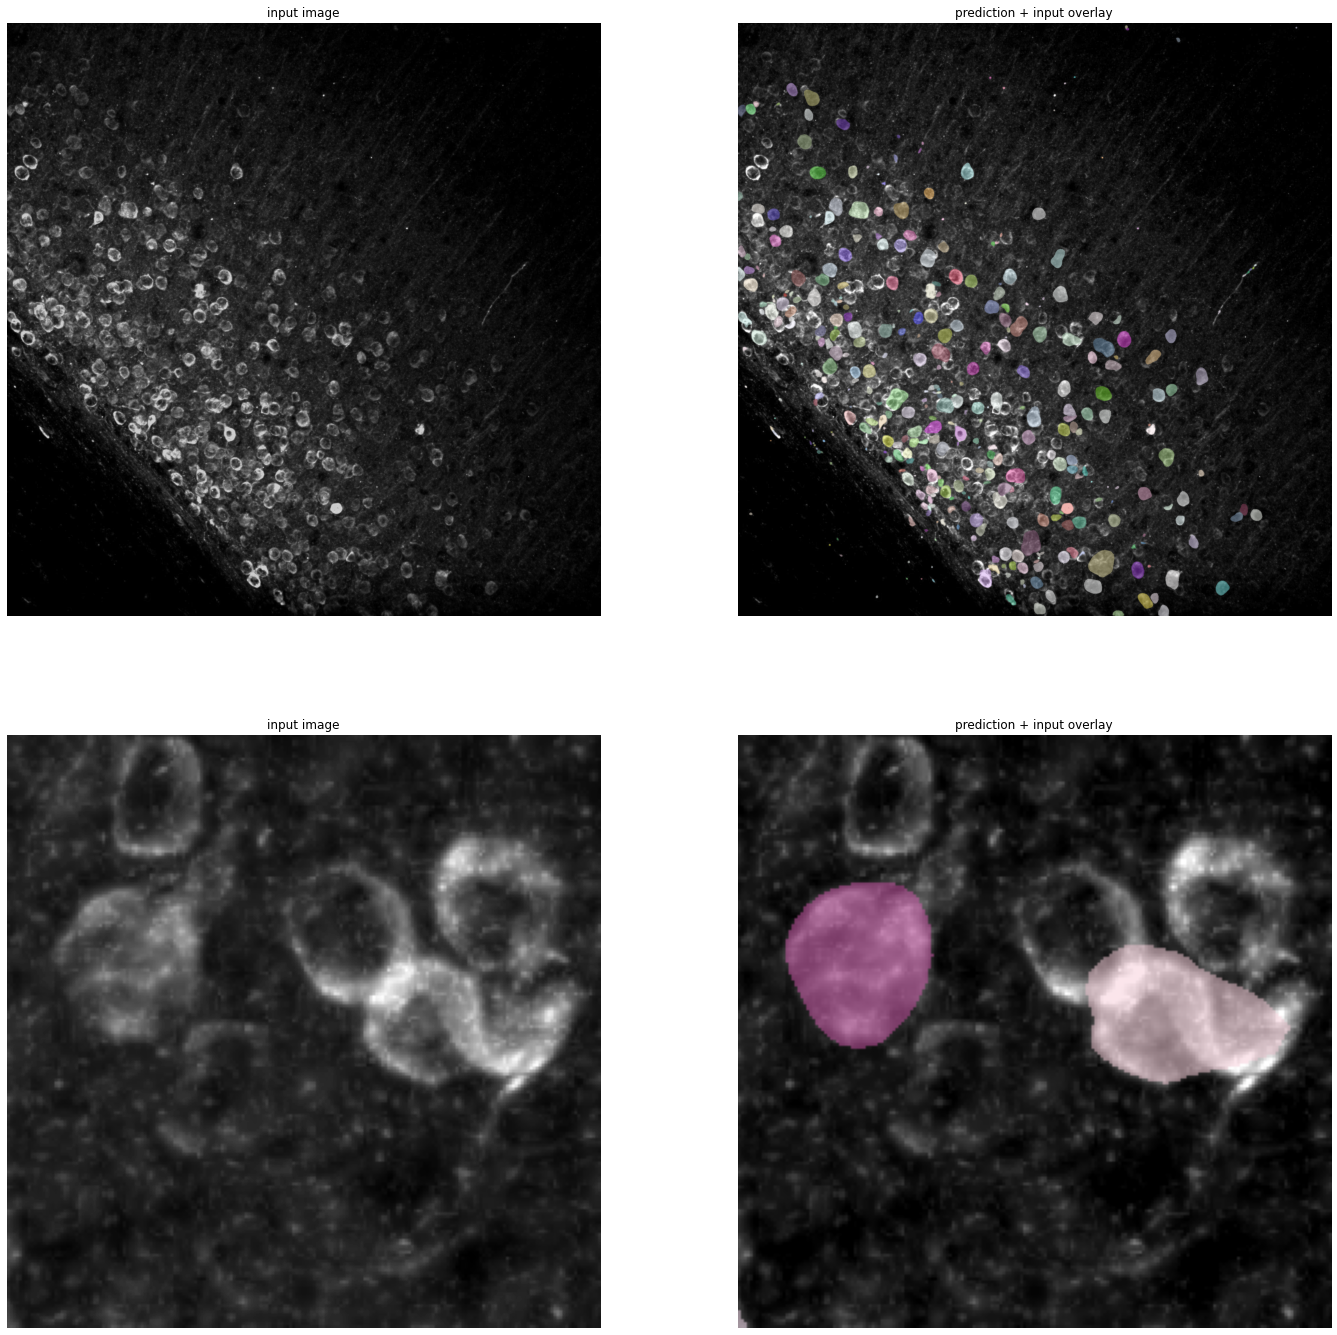

In [5]:
img_tau = io.imread('../data/raw/0104_p301s_tau.jpg') 
img_tau_gray = rgb2gray(img_tau)
labels_tau, _ = model.predict_instances(normalize(img_tau_gray))

fig = plt.figure(figsize=(24, 24))

plt.subplot(2,2,1)
plt.imshow(img_tau_gray, cmap='gray')
plt.axis("off")
plt.title("input image")

plt.subplot(2,2,2)
plt.imshow(render_label(labels_tau, img=img_tau_gray))
plt.axis("off")
plt.title("prediction + input overlay")

plt.subplot(2,2,3)
plt.imshow(img_tau_gray[1000:1200, 1000:1200], 
           cmap='gray')
plt.axis("off")
plt.title("input image")

plt.subplot(2,2,4)
plt.imshow(render_label(labels_tau[1000:1200,1000:1200], 
                        img=img_tau_gray[1000:1200,1000:1200]))
plt.title("prediction + input overlay")
plt.axis('off')

plt.show()

tau-images, clearly harder to detect.
- process image
- fill wholes!

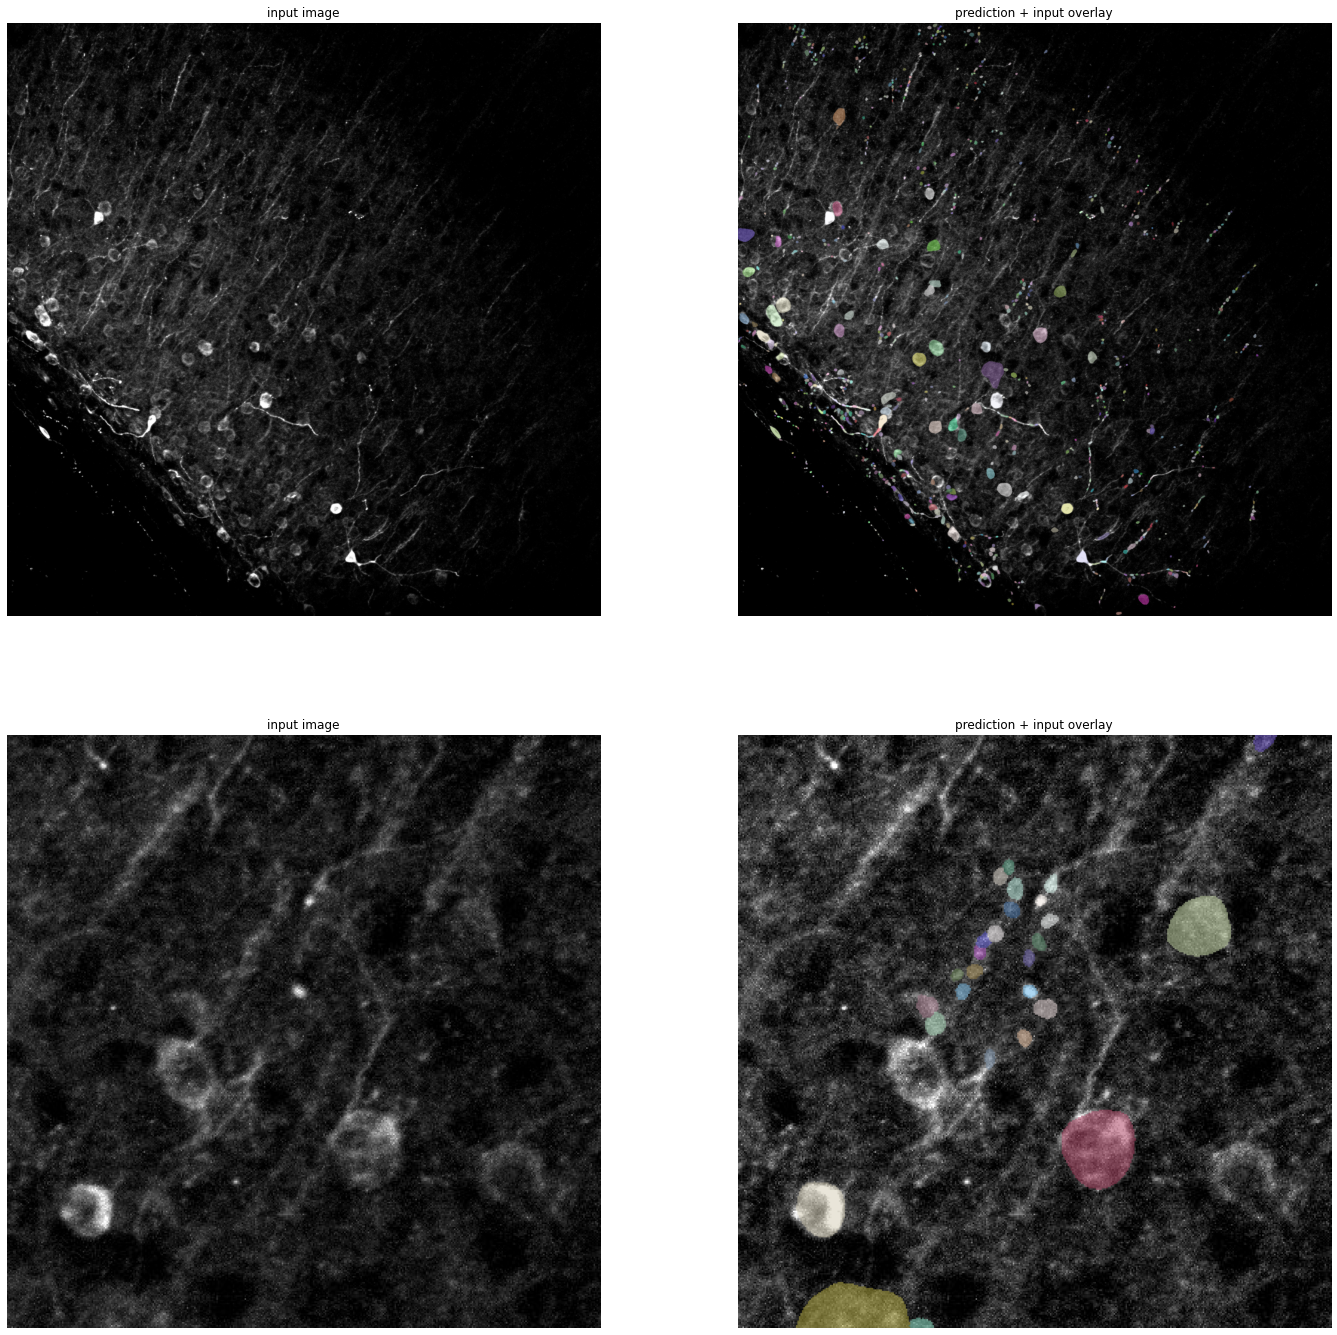

In [51]:
img_ptau = io.imread('../data/raw/0104_p301s_p-tau.jpg') 
labels_ptau, _ = model.predict_instances(normalize(img_ptau))

fig = plt.figure(figsize=(24, 24))

plt.subplot(2,2,1)
plt.imshow(img_ptau, cmap='gray')
plt.axis("off")
plt.title("input image")

plt.subplot(2,2,2)
plt.imshow(render_label(labels_ptau, img=img_ptau))
plt.axis("off")
plt.title("prediction + input overlay")

plt.subplot(2,2,3)
plt.imshow(img_ptau[800:1200, 800:1200], 
           cmap='gray')
plt.axis("off")
plt.title("input image")

plt.subplot(2,2,4)
plt.imshow(render_label(labels_ptau[800:1200,800:1200], 
                        img=img_ptau[800:1200,800:1200]))
plt.title("prediction + input overlay")
plt.axis('off')


plt.show()

Check this with Elise. 
__NB__: Here, I have to differentiate between gray and white cells!! -> classifier!